In [16]:
import datacube
from matplotlib import pyplot
from datacube.helpers import write_geotiff

In [2]:
# you will need a datacube confing:
config = {
    'db_hostname': 'agdcdev-db.nci.org.au',
    'db_port': 6432,
    'db_database': 'dg6911'
}
dc = datacube.Datacube(config=config)

In [3]:
#roughly Australia
query = {}
query['latitude'] = (-44,-9)
query['longitude'] = (113,154)

In [17]:
def write_barra_data(filename, target_dataset, source_affine, nodata=-1073741824):
    profile_override = {'nodata': nodata, 'transform': source_affine}
    write_geotiff(filename, target_dataset, profile_override=profile_override)

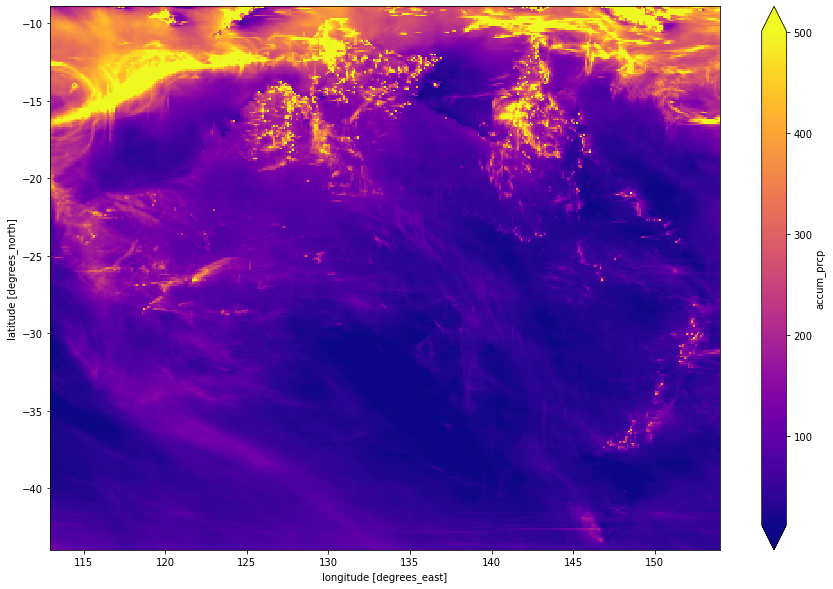

In [12]:
accum_prcp = dc.load(product='accum_prcp_daily', time='1990-01', **query)
daily_accum_prcp = accum_prcp['accum_prcp'].sum(dim='time')
daily_accum_prcp.squeeze().plot.imshow(cmap='plasma', size=10, robust=True)

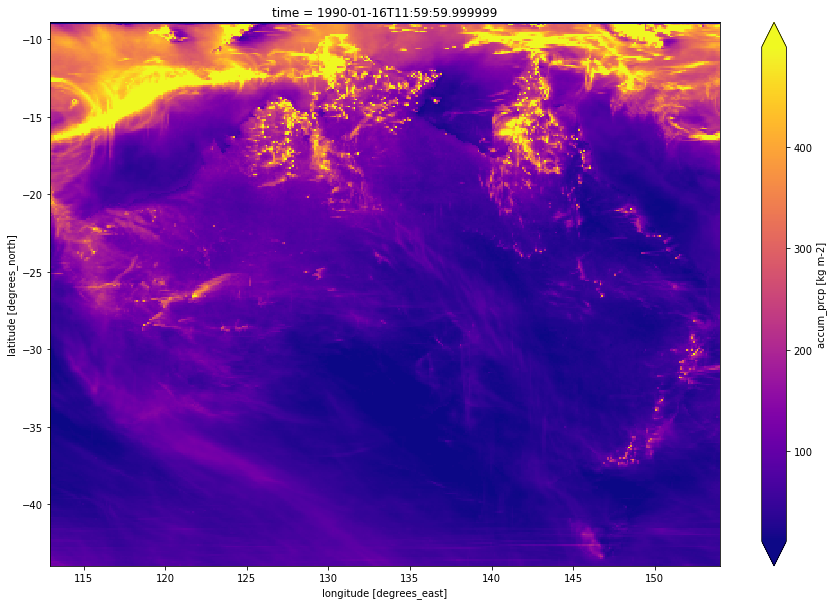

In [13]:
monthy_accum_prcp = dc.load(product='accum_prcp_monthly', time='1990-01', **query)
monthy_accum_prcp['accum_prcp'].squeeze().plot.imshow(cmap='plasma', size=10, robust=True)

In [25]:
total_day_accumprcp_dataset = daily_accum_prcp.to_dataset()
total_day_accumprcp_dataset['accum_prcp'].attrs = accum_prcp['accum_prcp'].attrs
total_day_accumprcp_dataset.attrs = accum_prcp['accum_prcp'].attrs
write_barra_data('from_barra_daily_19900101_accum_prcp.tiff', total_day_accumprcp_dataset, accum_prcp.affine)

In [28]:
write_barra_data('from_barra_month_19900101_accum_prcp.tiff', monthy_accum_prcp.squeeze(), monthy_accum_prcp.affine)

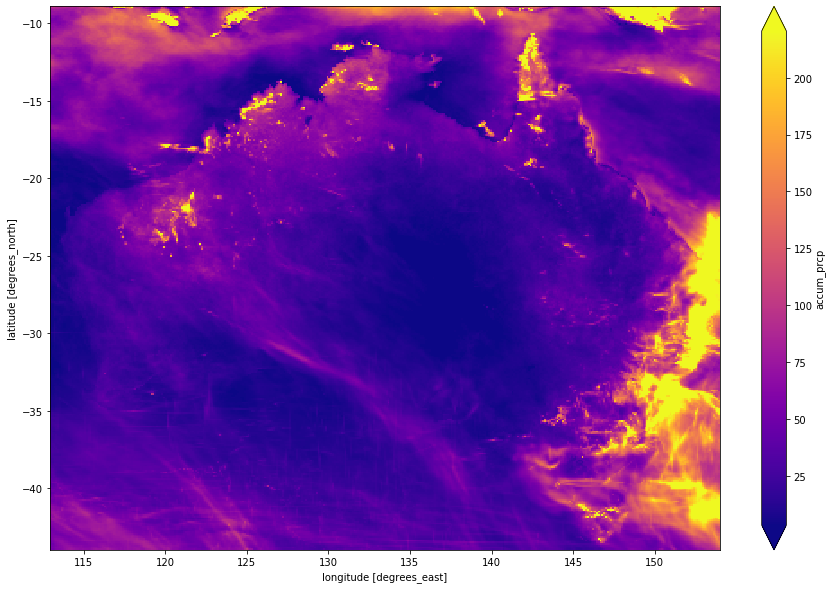

In [29]:
accum_prcp = dc.load(product='accum_prcp_daily', time='1990-02', **query)
yearly_accum_prcp = accum_prcp['accum_prcp'].sum(dim='time')
yearly_accum_prcp.squeeze().plot.imshow(cmap='plasma', size=10, robust=True)

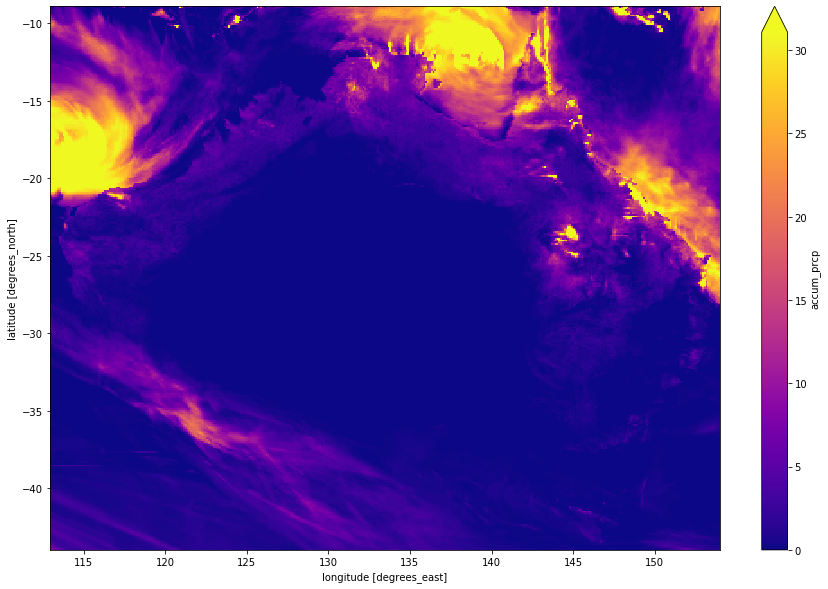

In [32]:
accum_prcp = dc.load(product='accum_prcp_daily', time='1990-03-02', **query)
yearly_accum_prcp = accum_prcp['accum_prcp'].sum(dim='time')
yearly_accum_prcp.squeeze().plot.imshow(cmap='plasma', size=10, robust=True)